In [110]:
# Importing modules

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

In [3]:
# Importing datasets

observations = pd.read_csv(r'C:\Users\shaih\OneDrive\Desktop\Home\Home\Programming\Codecademy\biodiversity-starter\biodiversity_starter\observations.csv')
observations

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [4]:
species_info = pd.read_csv(r'C:\Users\shaih\OneDrive\Desktop\Home\Home\Programming\Codecademy\biodiversity-starter\biodiversity_starter\species_info.csv')
species_info

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [12]:
# Understanding the dataset

num_scientific_names = len(observations["scientific_name"].unique())
parks = observations["park_name"].unique()
num_parks = len(parks)


print(f"There are {num_scientific_names} unique scientific names in the dataset.")

print(f"\nThere are {num_parks} unique parks in the dataset. They are:")
for park in parks:
    display(park)

print("\nThe conservation statuses used in the dataset are:")
for status in species_info["conservation_status"].unique():
    display(status)

print("\nThere different categories of organisms observed in the dataset are:")
for category in species_info["category"].unique():
    display(category)

There are 5541 unique scientific names in the dataset.

There are 4 unique parks in the dataset. They are:


'Great Smoky Mountains National Park'

'Yosemite National Park'

'Bryce National Park'

'Yellowstone National Park'


The conservation statuses used in the dataset are:


nan

'Species of Concern'

'Endangered'

'Threatened'

'In Recovery'


There different categories of organisms observed in the dataset are:


'Mammal'

'Bird'

'Reptile'

'Amphibian'

'Fish'

'Vascular Plant'

'Nonvascular Plant'

Text(0, 0.5, 'Count')

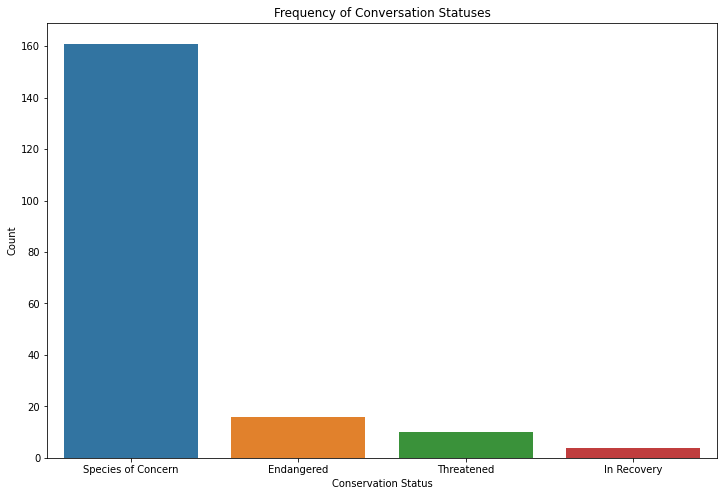

In [52]:
# First, let's assess the conservation statuses of our organisms in the dataset

species_info_modified = species_info.copy()
species_info_modified = species_info_modified.dropna()

conservation_status_values = species_info_modified["conservation_status"].value_counts()


fig = plt.figure(figsize = (12, 8))

ax = plt.subplot()

sns.countplot(data = species_info_modified, x = "conservation_status")

ax.set_title("Frequency of Conversation Statuses")
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Count")

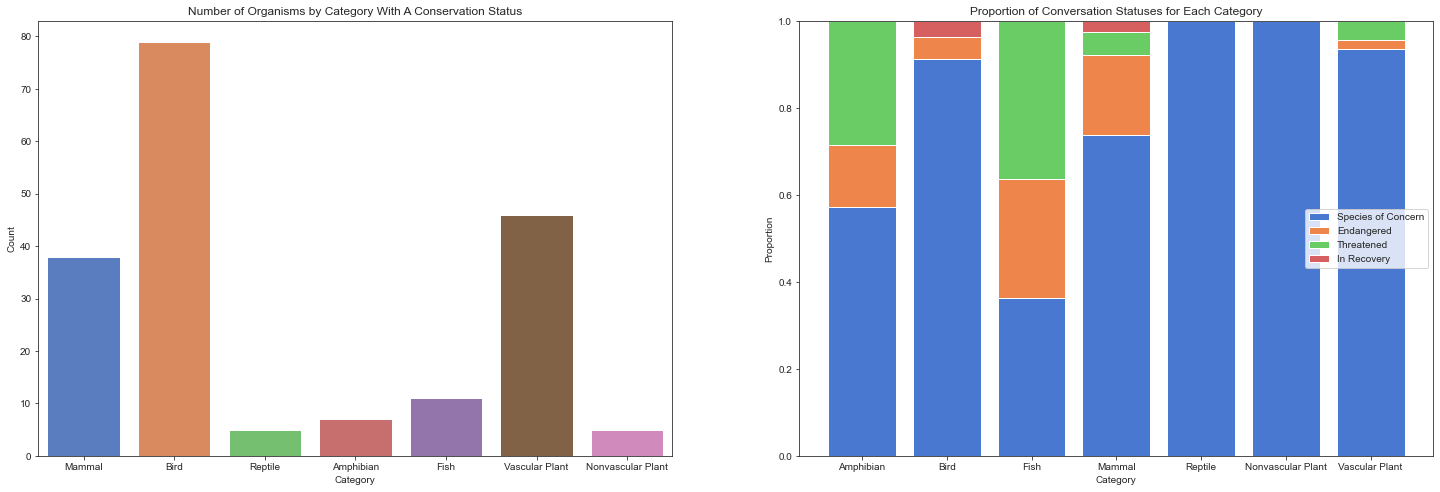

In [105]:
# Let's investigate how conservation status differs between category of organism

fig = plt.figure(figsize = (25, 8))
sns.set_palette("muted")
sns.set_style('ticks')

ax1 = plt.subplot(1, 2, 1)

sns.countplot(data = species_info_modified, x = "category")

ax1.set_title("Number of Organisms by Category With A Conservation Status")
ax1.set_xlabel("Category")
ax1.set_ylabel("Count")

ax2 = plt.subplot(1, 2, 2)

labels = ["Amphibian", "Bird", "Fish", "Mammal", "Reptile", "Nonvascular Plant", "Vascular Plant"]
category_counts = [len(species_info_modified[species_info_modified["category"] == "Amphibian"]), len(species_info_modified[species_info_modified["category"] == "Bird"]), \
                   len(species_info_modified[species_info_modified["category"] == "Fish"]), len(species_info_modified[species_info_modified["category"] == "Mammal"]), \
                   len(species_info_modified[species_info_modified["category"] == "Reptile"]), len(species_info_modified[species_info_modified["category"] == "Nonvascular Plant"]), \
                   len(species_info_modified[species_info_modified["category"] == "Vascular Plant"])]        
endangered_props = np.array([1, 4, 3, 7, 0, 0, 1]) / np.array(category_counts)
species_of_concern_props = np.array([4, 72, 4, 28, 5, 5, 43]) / np.array(category_counts)
threatened_props = np.array([2, 0, 4, 2, 0, 0, 2]) / np.array(category_counts)
in_recovery_props = np.array([0, 3, 0, 1, 0, 0, 0]) / np.array(category_counts)

plt.bar(x = labels, height = species_of_concern_props)
plt.bar(x = labels, height = endangered_props, bottom = species_of_concern_props)
plt.bar(x = labels, height = threatened_props, bottom = species_of_concern_props + endangered_props)
plt.bar(x = labels, height = in_recovery_props, bottom = species_of_concern_props + endangered_props + threatened_props)

ax2.set_title("Proportion of Conversation Statuses for Each Category")
ax2.set_xlabel("Category")
ax2.set_ylabel("Proportion")
ax2.legend(["Species of Concern", "Endangered", "Threatened", "In Recovery"], loc = "right")

In [127]:
# Next, let's test the statistical significance of the differences of conservation status between categories

category_conservation_contingency = pd.crosstab(species_info["category"], species_info["conservation_status"])

chi2, pval, dof, expected = chi2_contingency(category_conservation_contingency)
pval

1.8909788349761653e-05

[Text(0, 0, '0'),
 Text(0, 500000, '0.5'),
 Text(0, 1000000, '1'),
 Text(0, 1500000, '1.5'),
 Text(0, 2000000, '2'),
 Text(0, 2500000, '2.5')]

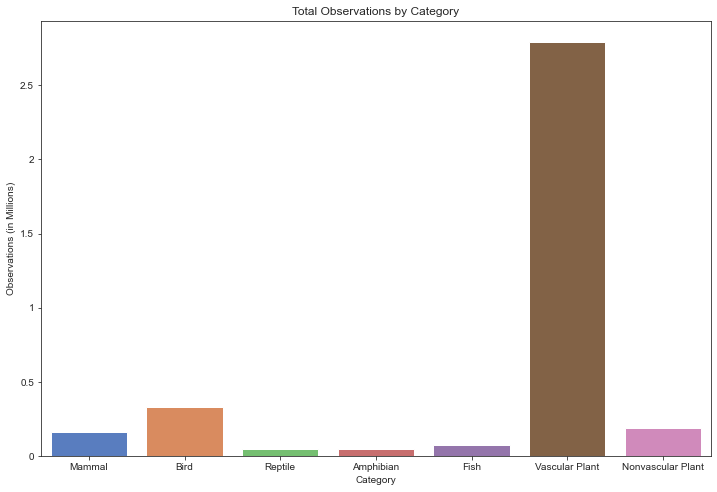

In [149]:
# Let's find the total number of observations by category over all 4 parks

merged_dataset = pd.merge(observations, species_info, on = "scientific_name")

num_observations_mammal = np.sum(merged_dataset["observations"][merged_dataset["category"] == "Mammal"])
num_observations_bird = np.sum(merged_dataset["observations"][merged_dataset["category"] == "Bird"])
num_observations_reptile = np.sum(merged_dataset["observations"][merged_dataset["category"] == "Reptile"])
num_observations_amphibian = np.sum(merged_dataset["observations"][merged_dataset["category"] == "Amphibian"])
num_observations_fish = np.sum(merged_dataset["observations"][merged_dataset["category"] == "Fish"])
num_observations_vascular = np.sum(merged_dataset["observations"][merged_dataset["category"] == "Vascular Plant"])
num_observations_nonvascular = np.sum(merged_dataset["observations"][merged_dataset["category"] == "Nonvascular Plant"])

heights = [num_observations_mammal, num_observations_bird, num_observations_reptile, num_observations_amphibian, num_observations_fish, num_observations_vascular, num_observations_nonvascular]
labels = ["Mammal", "Bird", "Reptile", "Amphibian", "Fish", "Vascular Plant", "Nonvascular Plant"]


fig = plt.figure(figsize = (12, 8))

ax = plt.subplot()

sns.barplot(x = labels, y = heights)

ax.set_title("Total Observations by Category")
ax.set_xlabel("Category")
ax.set_ylabel("Observations (in Millions)")

ax.set_yticks(range(0, 3000000, 500000))
ax.set_yticklabels([0, 0.5, 1, 1.5, 2, 2.5])